<a href="https://colab.research.google.com/github/MatthewTafazoli/Student-Adaptivity-prediction-model/blob/main/AdaptivityClassifierTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Use Google Colab's native function to import our data into the notebook
from google.colab import files
 
 
uploaded = files.upload()

Saving data.csv to data (1).csv


In [16]:
#Import our necessary packages and then display the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv("data.csv")
display(df)


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


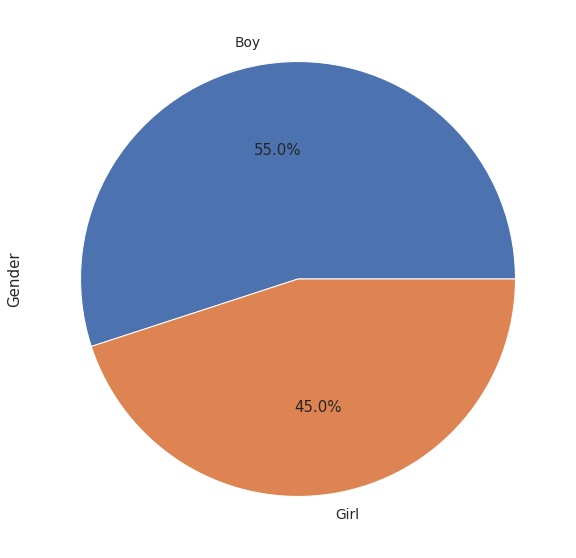

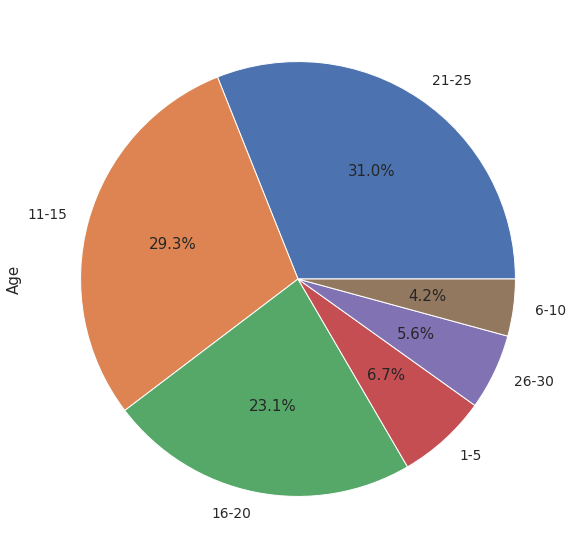

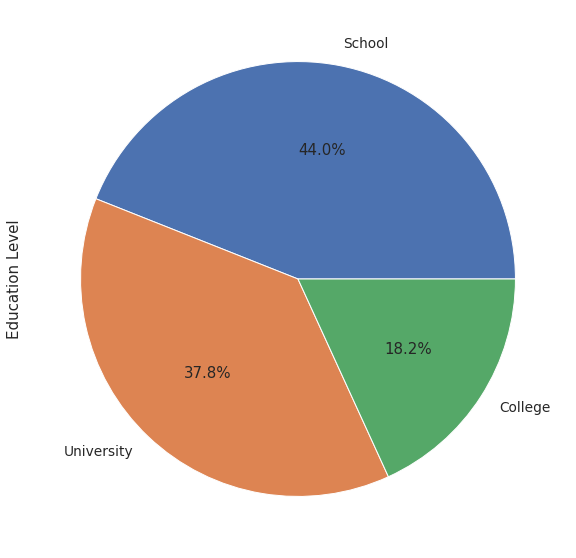

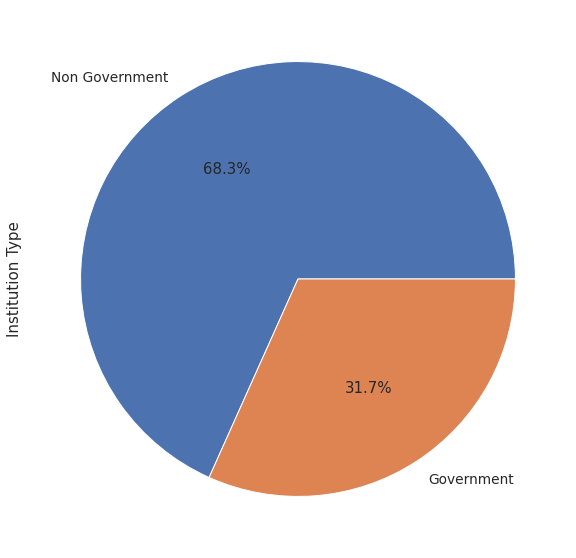

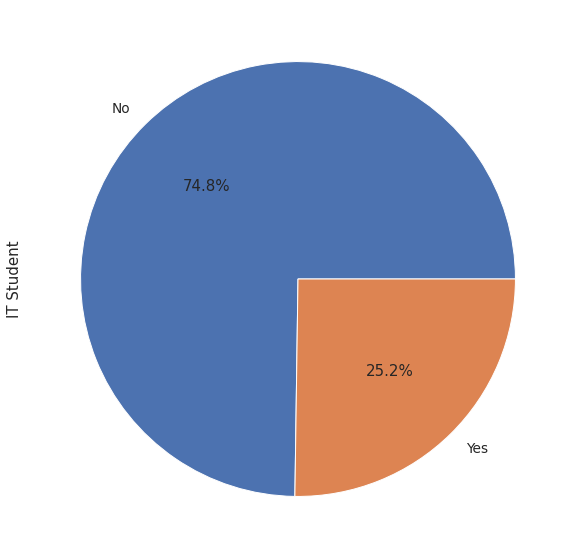

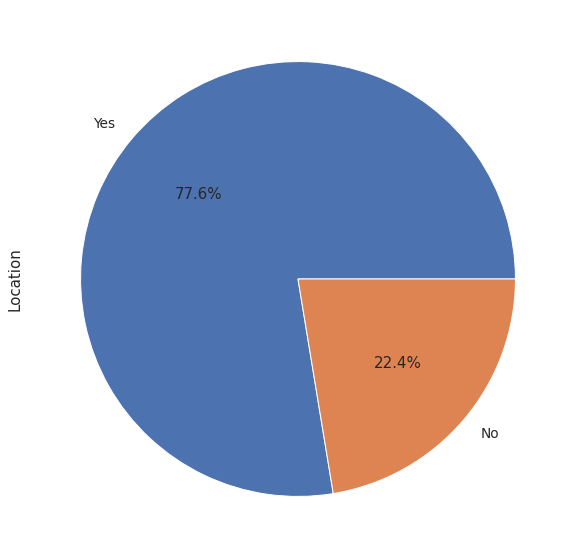

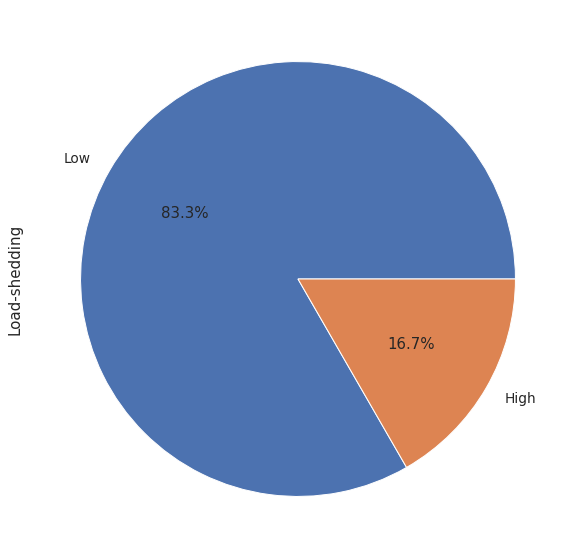

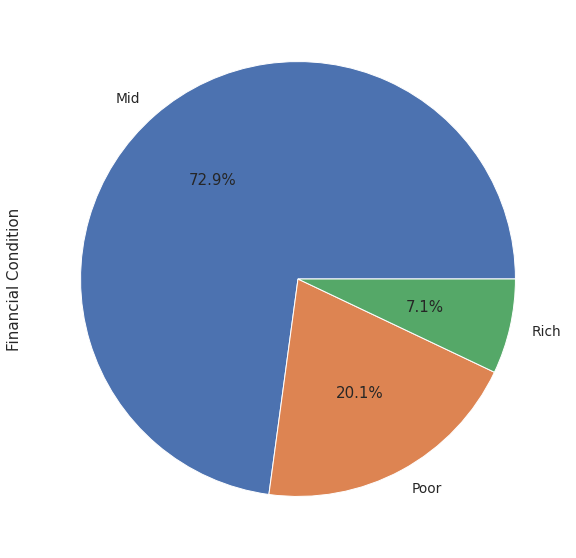

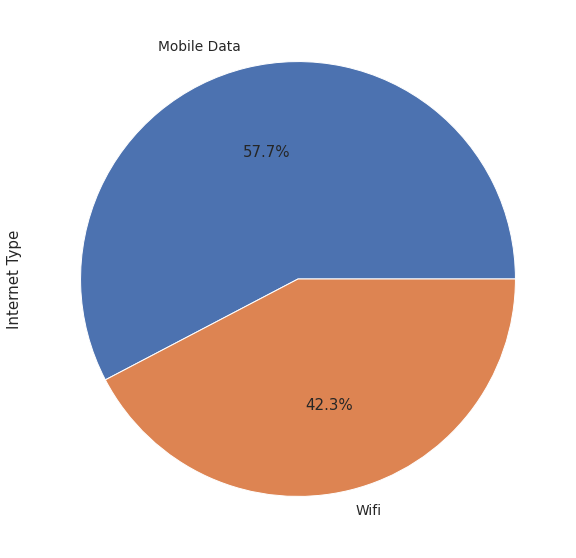

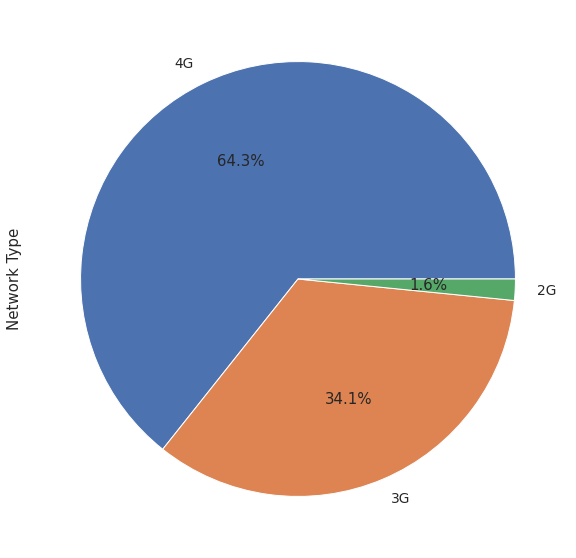

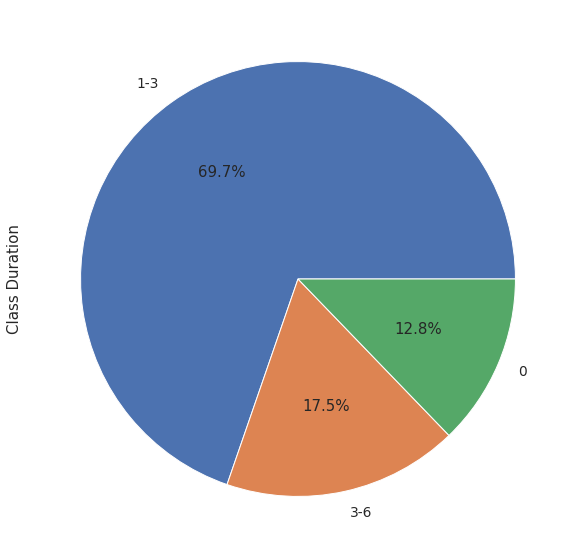

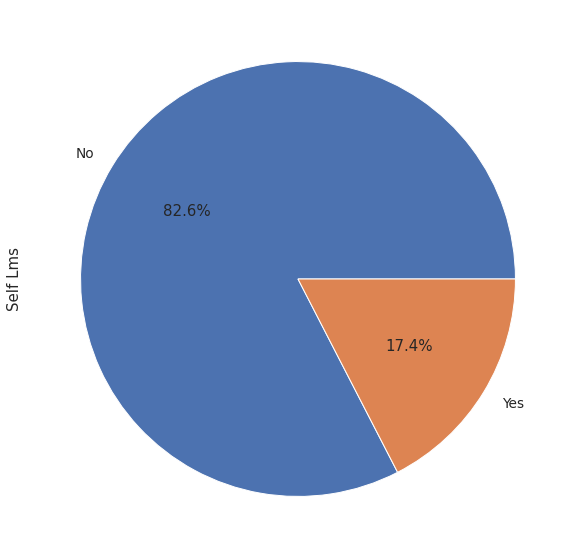

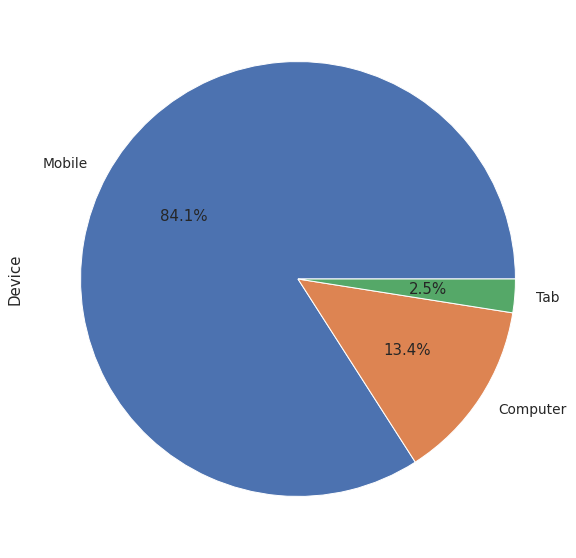

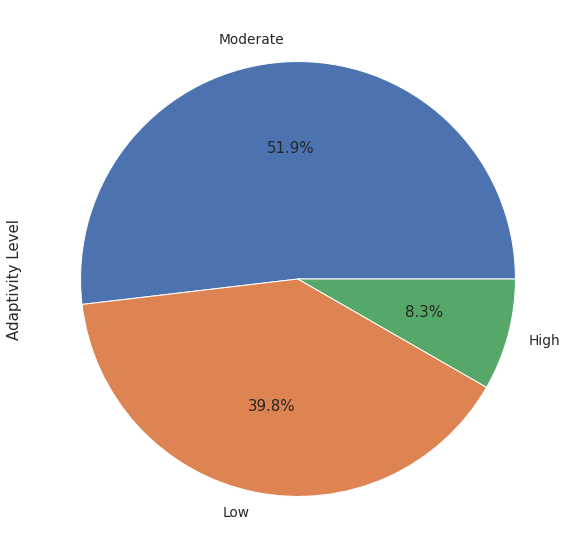

In [17]:
#Create Pie Graphs to visualize the values contained in each feature column
for i in df:
  plt.figure(1, figsize=(10,10))
  df[i].value_counts().plot.pie(autopct="%1.1f%%")
  plt.show()

In [28]:
#Check the value count of each unique feature value in the dataset
for i in df:
  display(df[i].value_counts().sort_index())

0    663
1    542
Name: Gender, dtype: int64

0     51
1    278
2     68
3     81
4    353
5    374
Name: Age, dtype: int64

0    456
1    530
2    219
Name: Education Level, dtype: int64

0    823
1    382
Name: Institution Type, dtype: int64

0    304
1    901
Name: IT Student, dtype: int64

0    935
1    270
Name: Location, dtype: int64

0     201
1    1004
Name: Load-shedding, dtype: int64

0    242
1    878
2     85
Name: Financial Condition, dtype: int64

0    695
1    510
Name: Internet Type, dtype: int64

0     19
1    411
2    775
Name: Network Type, dtype: int64

0    154
1    840
2    211
Name: Class Duration, dtype: int64

0    210
1    995
Name: Self Lms, dtype: int64

0      30
1     162
2    1013
Name: Device, dtype: int64

0    100
1    480
2    625
Name: Adaptivity Level, dtype: int64

In [27]:
#Function to change the non-numeric feature values to numeric so we can perform regression on the data
def to_numeric(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [20]:
#Compare the feature values of the dataset before and after the transform
display(df.head(5))
df = to_numeric(df)
display(df.head(5))

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,5,0,0,1,0,1,1,1,2,2,1,0,2
1,1,5,0,0,1,0,0,1,0,2,1,0,2,2
2,1,1,2,1,1,0,1,1,1,2,1,1,2,2
3,1,4,1,0,1,0,1,1,0,2,1,1,2,2
4,1,1,1,0,1,0,1,0,0,1,0,1,2,1


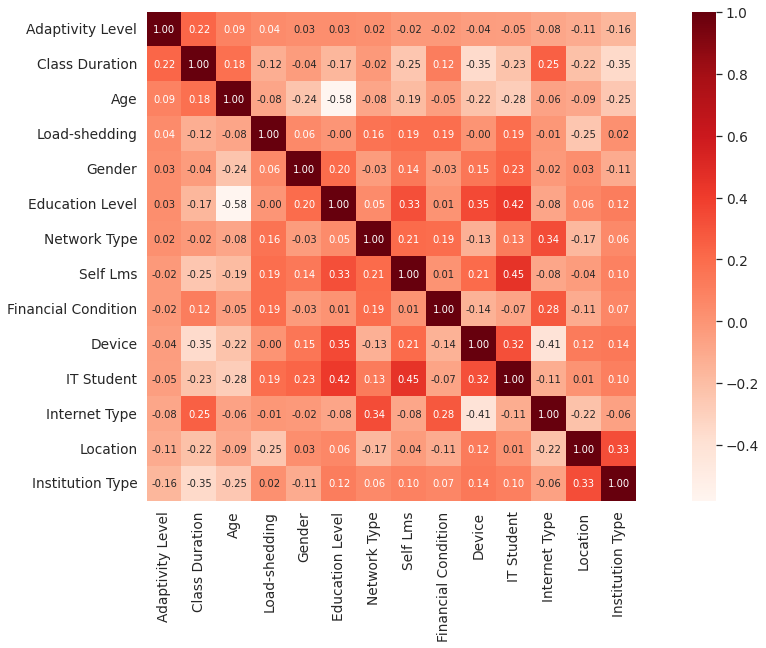

In [21]:
#Generate a correlation heatmap for the 14 parameters in the dataset
corr = df.corr()
plt.figure(figsize=(20, 9))
k = 14 #number of variables for heatmap
cols = corr.nlargest(k, 'Adaptivity Level')['Adaptivity Level'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values,cmap="Reds")
plt.show()

In [22]:
#Check to confirm no null values in the dataset
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [23]:
#Split the data into train/test partitions, with a 70/30 split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Adaptivity Level', axis=1),
                                                    df['Adaptivity Level'],
                                                    test_size=0.3,
                                                    random_state=0)
x_train.shape, x_test.shape

((843, 13), (362, 13))

In [24]:
#Import the various models we will be trying 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

#libraries for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

lr = LogisticRegression(max_iter=20000,penalty='l2')
lda = LinearDiscriminantAnalysis()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
bg = BaggingClassifier()
gb = GradientBoostingClassifier()
ada = AdaBoostClassifier()
xgb = XGBClassifier()
extr = ExtraTreesClassifier()

from sklearn.ensemble import VotingClassifier
clf1 = ExtraTreesClassifier()
clf2 = RandomForestClassifier()

vc = VotingClassifier(estimators=[('ext', clf1),('rf', clf2)], voting='soft')

classifiers = [
    ("Logistic Regression" , lr),
    ("Linear Discriminant Analysis" , lda),
    ("Decision Tree" , dt),
    ("Random Forest", rf),
    ("Bagging", bg),
    ("Gradient Boosting", gb),
    ("Ada Boost", ada),
    ("XGB", xgb),
    ("Extra Trees", extr),
    ("Voting Classifier", vc)
]

In [30]:
#Check the train/test accuracy for each model as well as creating a classification report 
for classifier, func in classifiers:
    # Fit clf to the training set
    model = func.fit(x_train, y_train)
    print('\033[1m', 10*"=", f"{classifier}",10*"=", 
          "\n",'\033[1m' + "train accuracy:" + '\033[0m', model.score(x_train, y_train),"\n", 
          '\033[1m' + "test accuracy:" + '\033[0m', model.score(x_test, y_test))
    model_pred = func.predict(x_test)
    print('\033[1m' + "classification report: " + '\033[0m', "\n", 
          classification_report(model_pred, y_test))


 ========== Logistic Regression ========== 
 train accuracy: 0.6809015421115066 
 test accuracy: 0.6657458563535912
classification report:  
               precision    recall  f1-score   support

           0       0.03      0.25      0.06         4
           1       0.61      0.71      0.66       126
           2       0.82      0.65      0.72       232

    accuracy                           0.67       362
   macro avg       0.49      0.54      0.48       362
weighted avg       0.74      0.67      0.69       362

 ========== Linear Discriminant Analysis ========== 
 train accuracy: 0.6725978647686833 
 test accuracy: 0.649171270718232
classification report:  
               precision    recall  f1-score   support

           0       0.13      0.57      0.21         7
           1       0.53      0.70      0.60       111
           2       0.84      0.63      0.72       244

    accuracy                           0.65       362
   macro avg       0.50      0.63      0.51       362
w

In [26]:
#The most accurate model based on the classification report was trained via the Voting Classifier, so we will save that model
import joblib
joblib.dump(model, 'AdaptivityClassifier.sav')

['AdaptivityClassifier.sav']